In [77]:
import torch
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
F0_STD = 41.20620875707121
L_STD = 0.03757316168641439

Average Classification Accuracy 1.0


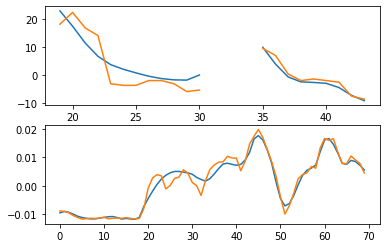

In [79]:
data = np.load('model_output_12_00-35.npy', allow_pickle=True)
batch_idx, within_batch = 4, 0
output_f0, output_voiced, output_amp = data[0, batch_idx, within_batch, 10:80, 0], data[0, batch_idx, within_batch, 10:80, 1], data[0, batch_idx, within_batch, 10:80, 2]
target_f0, target_voiced, target_amp = data[1, batch_idx, within_batch, 10:80, 0], data[1, batch_idx, within_batch, 10:80, 1], data[1, batch_idx, within_batch, 10:80, 2]

output_f0 *= F0_STD 
target_f0 *= F0_STD
output_amp *= L_STD
target_amp *= L_STD
output_f0[target_voiced <= 0] = float('nan')
target_f0[target_voiced <= 0] = float('nan')
output_voiced[output_voiced > 0.5] = 1
output_voiced[output_voiced < 0.5] = 0
accuracy = np.mean(target_voiced == output_voiced)
print("Average Classification Accuracy", accuracy)
fix, ax = plt.subplots(2)
ax[0].plot(output_f0)
ax[0].plot(target_f0)
ax[1].plot(output_amp)
ax[1].plot(target_amp)